# YOLOv3 커스텀 데이터 학습

copy from https://articlearn.id/article/e5571bb0-how-to-train-yolov3-on-google-colab-to-de/



# 레이블링 데이터 위치

구글 드라이브 tmp/ 폴더에 laptops_labeled.zip 데이터 파일을 준비한다.

<br>
laptops_labeled.zip 파일 내용

```
1.jpg
1.txt
2.jpg
2.txt
...
```

<br>
레이블 데이터 내용

1.txt
```
0 0.498403 0.541966 0.559105 0.585132
```
한줄만 있다. 

첫번째 0은 클래스 인덱스, 

0.498403, 0.541966은 박스의 중심

0.559105, 0.585132는 박스의 폭과 높이





# 탐지할 대상 이름 설정

In [1]:
CUSTOM_OBJECT_NAMES = ['laptop', 'keyboard']

# 0. 임포트

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob


# 1. 구글 드라이브 마운트, mydrive로 링크

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ln -s /content/gdrive/MyDrive/ /mydrive

# 2. Darknet 다운받아서 컴파일

## 프로젝트 다운로드

In [5]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15386, done.
remote: Total 15386 (delta 0), reused 0 (delta 0), pack-reused 15386
Receiving objects: 100% (15386/15386), 14.01 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (10345/10345), done.


OpenCV, GPU, CuDNN 사용 관련 설정하고 컴파일

In [6]:
%cd darknet

/content/darknet


## 컴파일 설정 파일 수정

In [7]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

## 컴파일

In [8]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# 3. 데이터 준비
- darknet/data/obj에 latops_labeled.zip 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성


In [9]:
!ls -al /content/gdrive/MyDrive/temp/Raccoon_yolov3_darknet_format.zip

-rw------- 1 root root 12044048 Jan  6 01:42 /content/gdrive/MyDrive/temp/Raccoon_yolov3_darknet_format.zip


## data/obj/laptops_labeled 폴더에 압축 풀기

In [ ]:
!rm -rf data/obj
!mkdir data/obj
!unzip /content/gdrive/MyDrive/temp/Raccoon_yolov3_darknet_format.zip -d data/obj/Raccoon

## 학습 위한 설정 파일 생성

학습에 직접 사용할 data/obj.names, data/obj.data, data/train.txt 파일을 생성한다.

<br>

data/obj.names
```
laptop
keyboard
```

<br>

data/obj.data
```
classes = 80
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = /mydrive/tmp/custom_object_detection
```

<br>

data/train.txt
```
data/obj/9.jpg
data/obj/12.jpg
data/obj/5.jpg
data/obj/3.jpg
data/obj/1.jpg
...
```



### data/obj.names

In [11]:
%%writefile data/obj.names
Raccoon

Writing data/obj.names


In [12]:
!cat data/obj.names

Raccoon

### data/obj.data

In [13]:
%%writefile data/obj.data
classes = 80
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = ./

Writing data/obj.data


In [14]:
!cat data/obj.data

classes = 80
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = ./

### data/train.txt


In [15]:
!ls -al /content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train

total 5304
drwxr-xr-x 2 root root 40960 Jun  8  2021 .
drwx------ 6 root root  4096 Jan  6 00:02 ..
-rw-r--r-- 1 root root     7 Jun  8  2021 _darknet.labels
-rw-r--r-- 1 root root 29260 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.txt
-rw-r--r-- 1 root root 34570 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.txt
-rw-r--r-- 1 root root 30824 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.txt
-rw-r--r-- 1 root root 45941 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.jpg
-rw-r--r-- 1 root root    77 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.txt
-rw-r--r-- 1 root root 19239 Jun  8  2021 raccoon-104_jpg.

In [16]:
# ls -al data/obj/laptops_labeled 밑에 jpg 파일들이 있으면
images_list = glob.glob("/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-183_jpg.rf.ec95835ea04533da42d4d959d6707f20.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-134_jpg.rf.17aaee25817c82dcccc9982cf2346af1.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-131_jpg.rf.abdd5f18ff49a86f887e2de9fb682bfa.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-28_jpg.rf.7b2be1128d5b1d3d43776e878d595a10.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-171_jpg.rf.e00ec73c6a64a07c1bc0035fa0fbca18.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-45_jpg.rf.fa6b0fabef2ed4f9e9dd6b164792d373.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-26_jpg.rf.ab207a81a546038c33a728a96bf86d14.jpg', '/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-137_jpg.rf.a67b07d85

In [17]:
!cat data/train.txt

/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-183_jpg.rf.ec95835ea04533da42d4d959d6707f20.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-134_jpg.rf.17aaee25817c82dcccc9982cf2346af1.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-131_jpg.rf.abdd5f18ff49a86f887e2de9fb682bfa.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-28_jpg.rf.7b2be1128d5b1d3d43776e878d595a10.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-171_jpg.rf.e00ec73c6a64a07c1bc0035fa0fbca18.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-45_jpg.rf.fa6b0fabef2ed4f9e9dd6b164792d373.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-26_jpg.rf.ab207a81a546038c33a728a96bf86d14.jpg
/content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/train/raccoon-137_jpg.rf.a67b07d859ac058643915ff7161e6c90

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [18]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-01-06 04:07:15--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   107MB/s    in 1.4s    

2022-01-06 04:07:17 (107 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [19]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

In [20]:
max_batches = 80 * 2000
max_batches = 100

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=64/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  /mydrive/tmp/yolov3_custom_last.weights 로 저장된다.

In [32]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4_custom
Couldn't open file: cfg/yolov4_custom.cfg


## 7. 탐지 실행

In [ ]:
!./darknet detect cfg/yolov3_custom.cfg /content/darknet/yolov3_custom_final.weights /content/darknet/data/obj/Raccoon/Raccoon_yolov3_darknet_format/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg

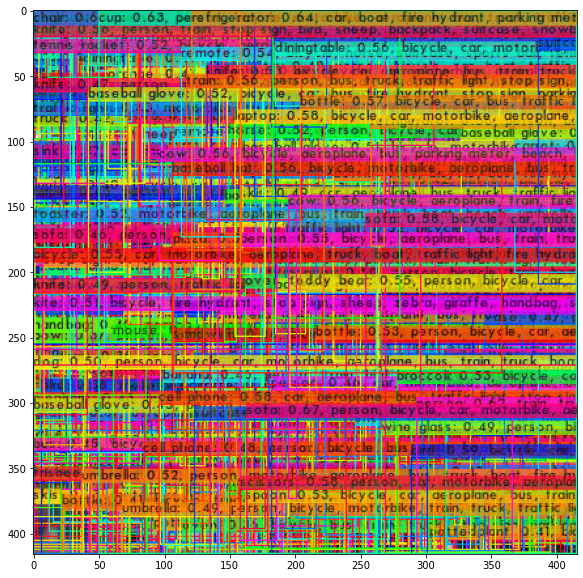

In [30]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()